https://lms.mipt.ru/mod/quiz/view.php?id=173813

## 1 задание


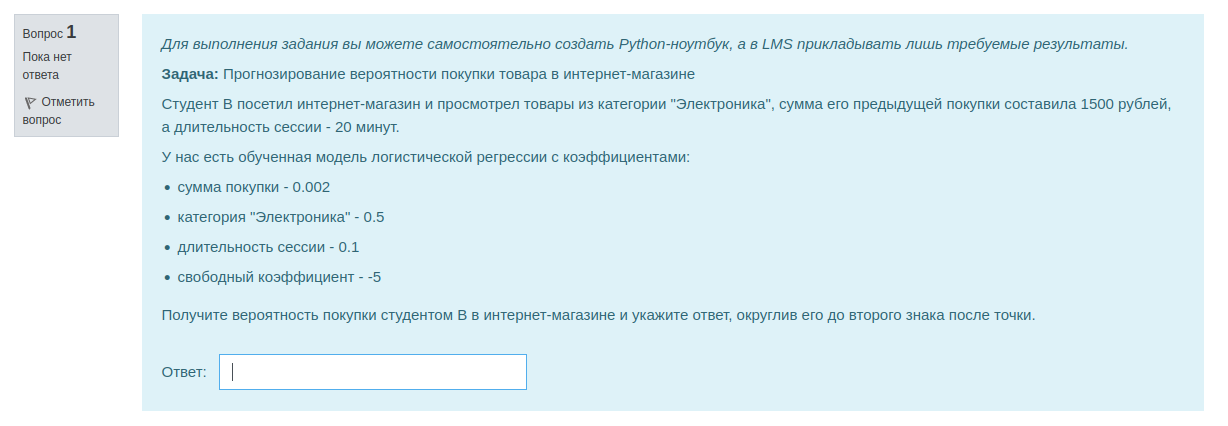

In [ ]:
import numpy as np

logit = 0.002 * 1500 + 0.5 * 1 + 0.1 * 20 - 5
proba = 1 / (1 + np.exp(-logit))
round(proba, 2)

0.62

## 2 задание

Имеется [датасет](https://www.kaggle.com/datasets/larsen0966/student-performance-data-set/data) для предсказания оценок студентов. Но мы возьмём немного измененную версию данных. Скачать её можно с [google drive](https://drive.google.com/file/d/1aUvz1OayVyGsfSCh3-zq8SqavyUjMgfC)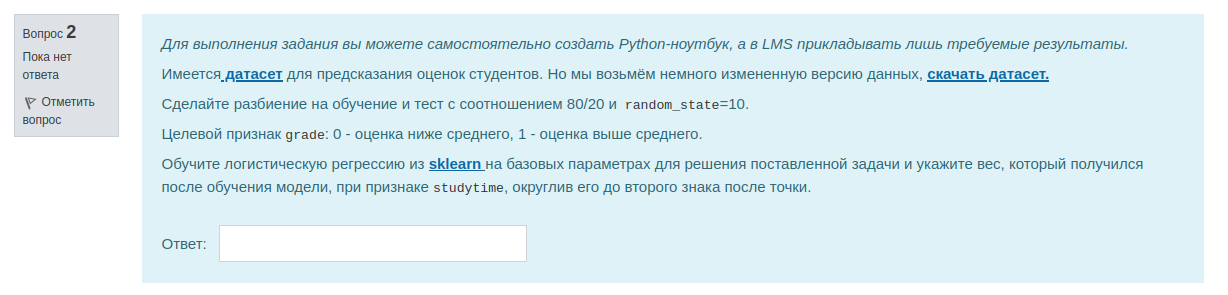

In [ ]:
!wget 'https://drive.google.com/uc?id=1aUvz1OayVyGsfSCh3-zq8SqavyUjMgfC' -O student.csv

--2024-09-18 07:24:29--  https://drive.google.com/uc?id=1aUvz1OayVyGsfSCh3-zq8SqavyUjMgfC
Resolving drive.google.com (drive.google.com)... 74.125.132.139, 74.125.132.100, 74.125.132.102, ...
Connecting to drive.google.com (drive.google.com)|74.125.132.139|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=1aUvz1OayVyGsfSCh3-zq8SqavyUjMgfC [following]
--2024-09-18 07:24:29--  https://drive.usercontent.google.com/download?id=1aUvz1OayVyGsfSCh3-zq8SqavyUjMgfC
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 173.194.195.132, 2607:f8b0:4001:c11::84
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|173.194.195.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 18989 (19K) [application/octet-stream]
Saving to: ‘student.csv’

student.csv         100%[===================>]  18.54K  --.-KB/s    in 0s      

2024-09-18 07:24:32 (80.8 MB/s) - ‘

In [ ]:
import pandas as pd

df = pd.read_csv('student.csv')

df.head()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,grade
0,18,4,4,2,2,0,4,3,4,1,1,3,4,1
1,17,1,1,1,2,0,5,3,3,1,1,3,2,1
2,15,1,1,1,2,0,4,3,2,2,3,3,6,1
3,15,4,2,1,3,0,3,2,2,1,1,5,0,2
4,16,3,3,1,2,0,4,3,2,1,2,5,0,1


In [ ]:
from sklearn.model_selection import train_test_split

target = 'grade'

X_train, X_test, y_train, y_test = train_test_split(df.drop(columns=['grade']),
                                                    df[target],
                                                    test_size=0.2,
                                                    random_state=10)

X_train.shape, X_test.shape

((519, 13), (130, 13))

In [ ]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression().fit(X_train, y_train)

print(round(lr.coef_[0][4], 2))

0.38


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## 3 задание

Продолжайте работать с [данными](https://drive.google.com/file/d/1aUvz1OayVyGsfSCh3-zq8SqavyUjMgfC) с предыдущего задания.

Вероятней всего (если у вас не отключены предупреждения) Python выдал `ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.`, такое встречается, если в данных есть признаки разных масштабов. Давайте исправим это с помощью масштабирования данных через стандартизацию.

1. Обучите модель StandardScaler на тренировочной выборке
2. Преобразуйте тренировочные и тестовые данных с помощью стандартизации
3. Укажите, какие диапазоны получились у признака age на тестовой выборке - значение min и max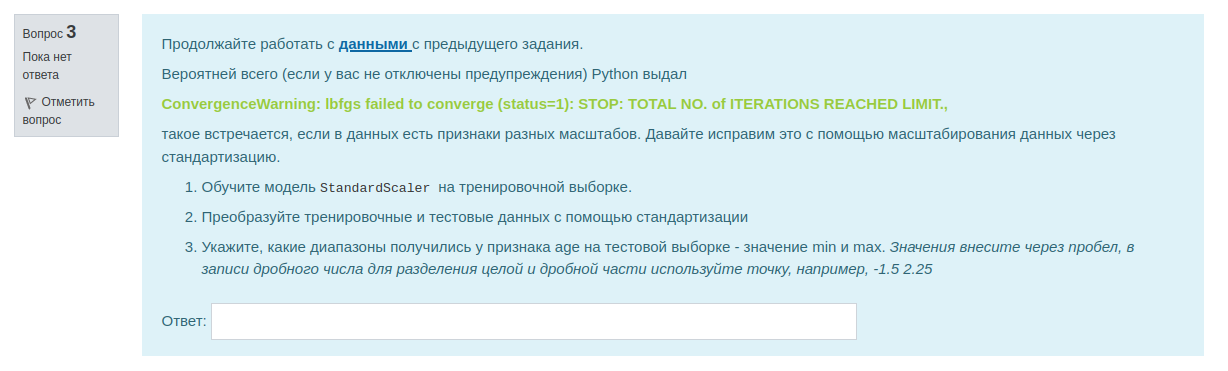

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()

X_train_scaled[X_train.columns] = scaler.fit_transform(X_train[X_train.columns])
X_test_scaled[X_train.columns] = scaler.transform(X_test[X_train.columns])

In [ ]:
print(f"min {round(X_test_scaled['age'].min(), 2)}\nmax {round(X_test_scaled['age'].max(), 2)}")

min -1.47
max 4.4


## 4 задание


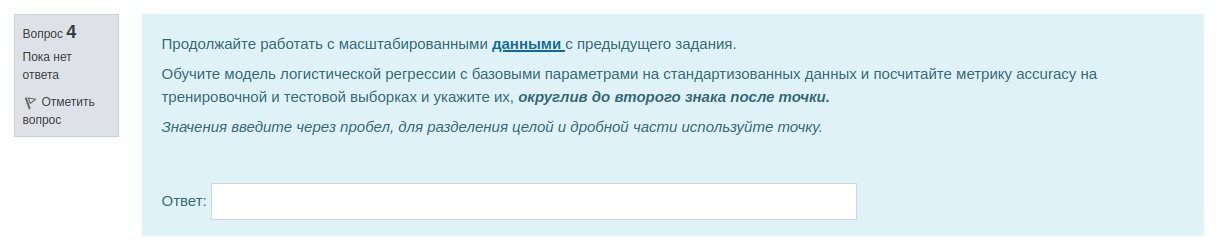

In [ ]:
lr = LogisticRegression().fit(X_train_scaled, y_train)

acc_train = lr.score(X_train_scaled, y_train)
acc_test = lr.score(X_test_scaled, y_test)
print('acc_train', round(acc_train, 2))
print('acc_test', round(acc_test, 2))

acc_train 0.76
acc_test 0.78


## 5 задание






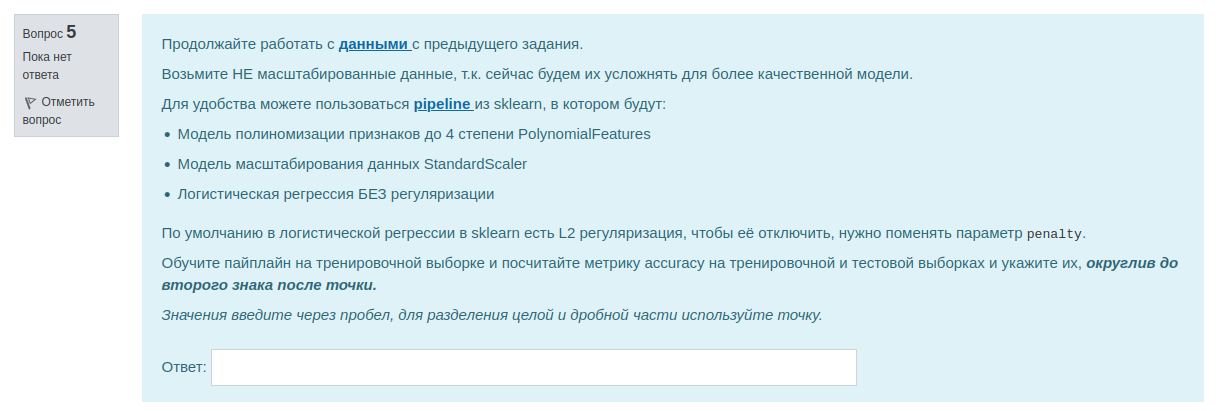

In [ ]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures


pipe = make_pipeline(
    PolynomialFeatures(degree=4),
    StandardScaler(),
    LogisticRegression(penalty=None)
).fit(X_train, y_train)


acc_train = pipe.score(X_train, y_train)
acc_test = pipe.score(X_test, y_test)
print('acc_train', round(acc_train, 2))
print('acc_test', round(acc_test, 2))

acc_train 0.95
acc_test 0.68


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## 6 задание


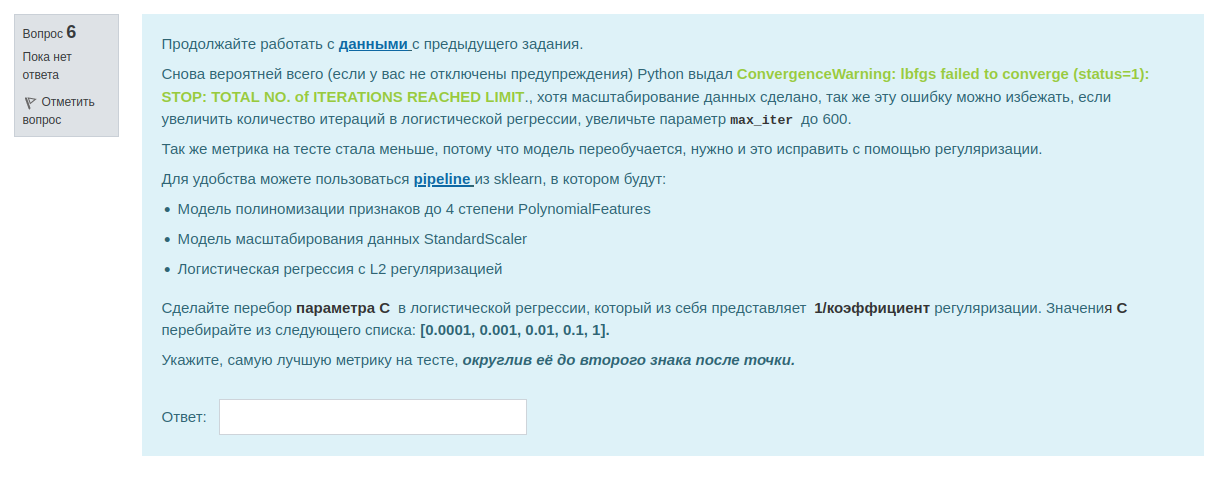

In [ ]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures

best_metric = 0
Cs = [0.0001, 0.001, 0.01, 0.1, 1]

for C in Cs:
    pipe = make_pipeline(
        PolynomialFeatures(degree=4),
        StandardScaler(),
        LogisticRegression(penalty='l2', C=C, max_iter=600)
    ).fit(X_train, y_train)


    acc_train = pipe.score(X_train, y_train)
    acc_test = pipe.score(X_test, y_test)
    print('acc_train', round(acc_train, 2))
    print('acc_test', round(acc_test, 2))

    if best_metric < acc_test:
        best_metric = acc_test

round(best_metric, 2)

acc_train 0.75
acc_test 0.81
acc_train 0.76
acc_test 0.78
acc_train 0.79
acc_test 0.79
acc_train 0.85
acc_test 0.78
acc_train 0.94
acc_test 0.7


0.81

## 7 задание

Имеется [датасет](https://www.kaggle.com/datasets/raviiloveyou/predict-taxi-fare-with-a-bigquery-ml-forecasting/data) для чаевых для таксиста . Но мы возьмём немного измененную версию данных. Скачать её можно с [google drive](https://drive.google.com/file/d/1d61u3TFvh47r-glk22SukNk1mQ4bmzS0)


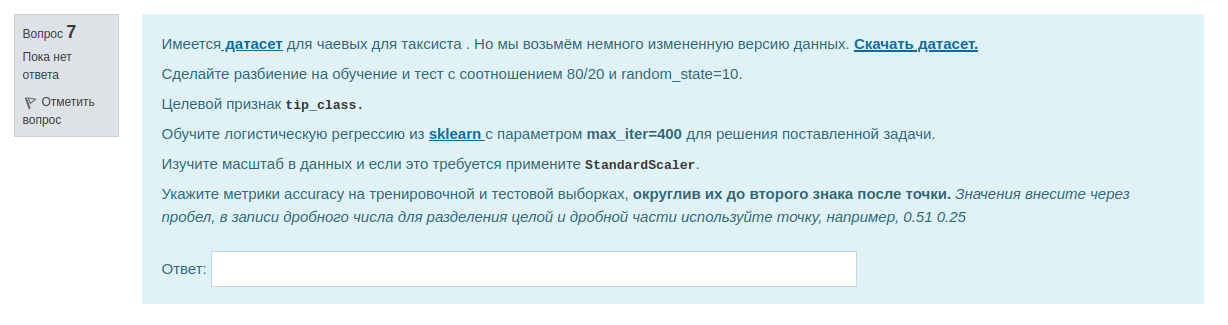

In [ ]:
!wget 'https://drive.google.com/uc?id=1d61u3TFvh47r-glk22SukNk1mQ4bmzS0' -O taxi.csv

--2024-09-18 07:26:44--  https://drive.google.com/uc?id=1d61u3TFvh47r-glk22SukNk1mQ4bmzS0
Resolving drive.google.com (drive.google.com)... 74.125.132.102, 74.125.132.100, 74.125.132.113, ...
Connecting to drive.google.com (drive.google.com)|74.125.132.102|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=1d61u3TFvh47r-glk22SukNk1mQ4bmzS0 [following]
--2024-09-18 07:26:44--  https://drive.usercontent.google.com/download?id=1d61u3TFvh47r-glk22SukNk1mQ4bmzS0
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 173.194.195.132, 2607:f8b0:4001:c11::84
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|173.194.195.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 6844259 (6.5M) [application/octet-stream]
Saving to: ‘taxi.csv’

taxi.csv            100%[===================>]   6.53M  --.-KB/s    in 0.1s    

2024-09-18 07:26:47 (63.2 MB/s) - ‘

In [ ]:
import pandas as pd

df = pd.read_csv('taxi.csv')
df.head()

,trip_duration,distance_traveled,num_of_passengers,fare,miscellaneous_fees,total_fare,surge_applied,tip_class
0,748.0,2.75,1.0,75.00,6.300,105.300,0,over med
1,1187.0,3.43,1.0,105.00,13.200,142.200,0,over med
2,329.0,2.09,1.0,45.00,13.200,70.200,0,under med
3,355.0,1.74,1.0,45.00,26.625,71.625,1,low
4,1288.0,5.21,1.0,116.25,26.325,178.575,1,high


In [ ]:
df['tip_class'].value_counts()

,count
tip_class,
under med,35798
low,35289
high,34156
over med,31922


In [ ]:
from sklearn.model_selection import train_test_split

target = 'tip_class'

X_train, X_test, y_train, y_test = train_test_split(df.drop(columns=target),
                                                    df[target],
                                                    test_size=0.2,
                                                    random_state=10)

X_train.shape, X_test.shape

((109732, 7), (27433, 7))

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline


pipe = make_pipeline(
    StandardScaler(),
    LogisticRegression(max_iter=400)
).fit(X_train, y_train)


acc_train = pipe.score(X_train, y_train)
acc_test = pipe.score(X_test, y_test)
print('acc_train', round(acc_train, 2))
print('acc_test', round(acc_test, 2))

acc_train 0.96
acc_test 0.96


## 8 задание

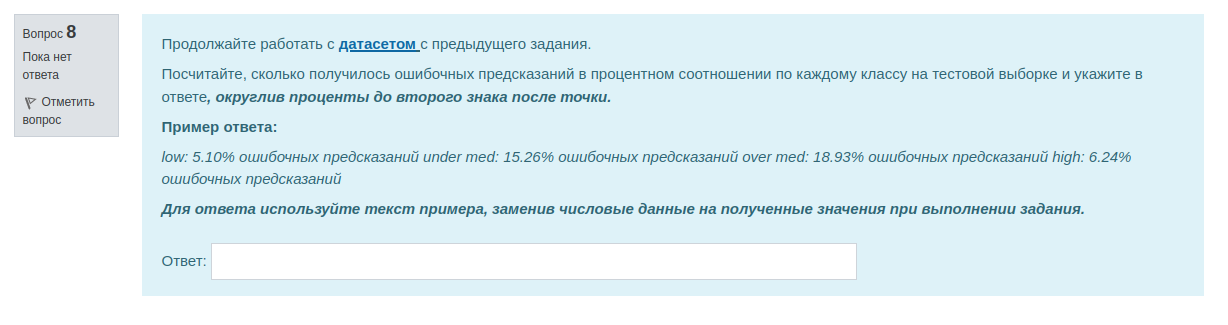

In [ ]:
from collections import Counter

preds = pipe.predict(X_test)

wrong_preds = {cls: 0 for cls in y_test.unique()}
total_preds = Counter(y_test)

for pred, true in zip(preds, y_test):
    if pred != true:
        wrong_preds[true] += 1

for cls in wrong_preds:
    accuracy = wrong_preds[cls] / total_preds[cls] * 100
    print(f"{cls}: {accuracy:.2f}% ошибочных предсказаний")

low: 6.93% ошибочных предсказаний
under med: 0.03% ошибочных предсказаний
over med: 6.88% ошибочных предсказаний
high: 2.46% ошибочных предсказаний
